## 3. Exploratory Data Analysis (EDA)
### Descriptive Statistics:
- Calculate basic statistics such as the number of reviews, average rating, and distribution of ratings.

### Visualization:
- Create visualizations such as word clouds to identify common words in positive and negative reviews.
- Plot the distribution of review ratings using histograms or bar charts.

# Exploratory Data Analysis (EDA)

## Data Overview
The preprocessed CSV file `2.1_preprocessed_reviews.csv` contains 627 entries with the following columns:
- **Username**: The username of the reviewer.
- **Rating**: The rating given by the reviewer (all ratings are 5).
- **Date**: The date of the review.
- **Comment**: The review text (preprocessed).

### 1. Distribution of Ratings

- Although all ratings are 5 in this dataset, visualizing the distribution can help confirm this and ensure data consistency.
- We visualize the distribution of ratings to confirm that all ratings are indeed 5.

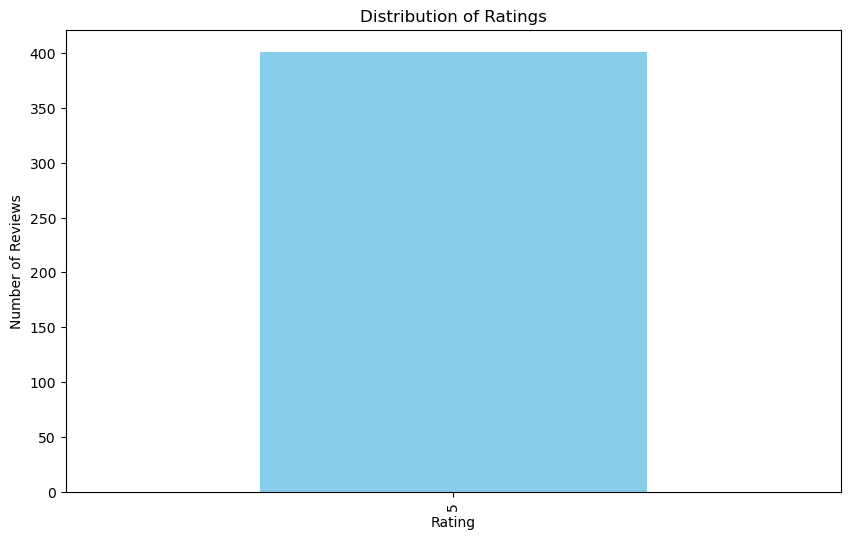

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed CSV file
file_path_eda = '2.1_preprocessed_reviews.csv'
df_preprocessed = pd.read_csv(file_path_eda)

# Distribution of Ratings
plt.figure(figsize=(10, 6))
df_preprocessed['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

### 2. Word Cloud of Comments

- Generate a word cloud to visualize the most frequent words in the review comments. This helps in understanding common themes and sentiments expressed by customers.
- We generate a word cloud to visualize the most frequent words in the review comments, providing insights into common themes and sentiments.

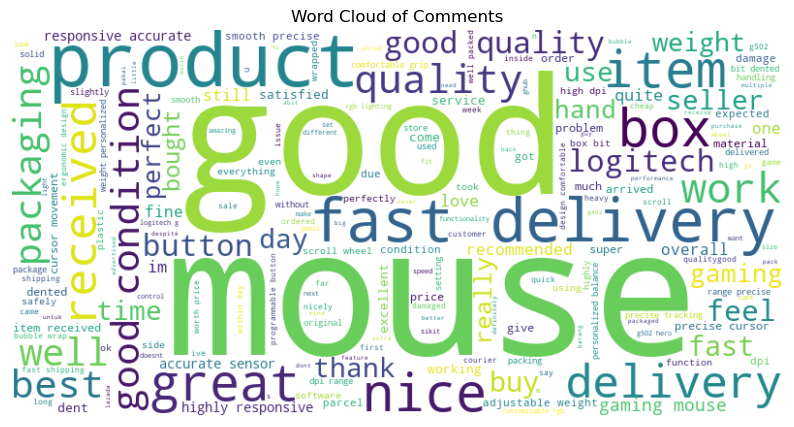

In [2]:
from wordcloud import WordCloud

# Word Cloud for Comments
text = ' '.join(df_preprocessed['Comment'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

### 3. Sentiment Analysis

- Perform sentiment analysis on the review comments to understand the overall sentiment.
- Using TextBlob, we classify each comment into positive, negative, or neutral sentiments and visualize the distribution of these sentiments.

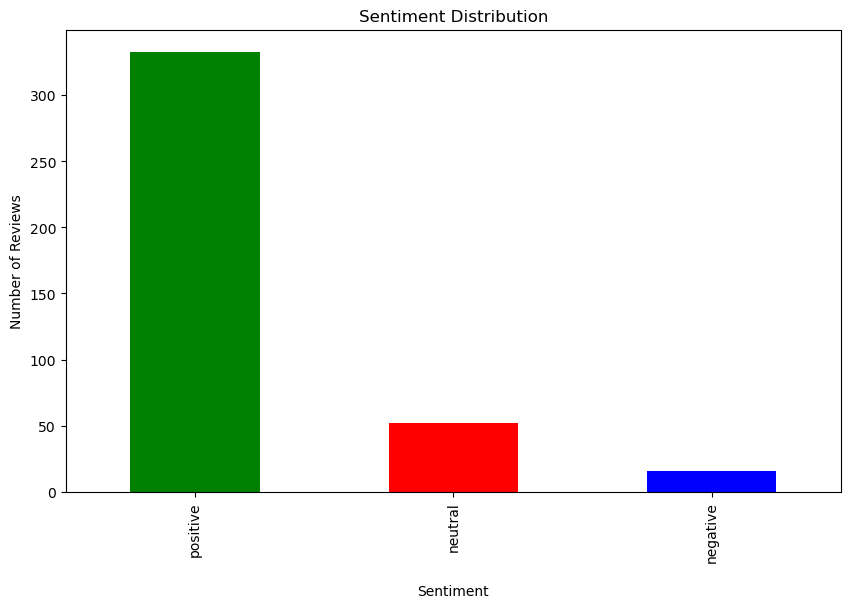

,Username,Rating,Date,Comment,Sentiment
0,A***.,5,1 day ago,highly responsive accurate sensor great feelin...,positive
1,Tiar Y.,5,14 Mar 2024,actually quite hesitate whrn buy mouse cu craz...,positive
2,Metheldis R.,5,31 Jan 2024,cheapest price itemsuperbly fast drop delivery...,positive
3,Jeff T.,5,10 Mar 2021,skeptical buy store zero review product decide...,positive
4,D***.,5,18 Sep 2021,fadt delivery well packaging box still intact ...,positive


In [3]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df_preprocessed['Sentiment'] = df_preprocessed['Comment'].apply(get_sentiment)

# Sentiment Distribution
sentiment_counts = df_preprocessed['Sentiment'].value_counts()
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('\nSentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Example of Sentiment Analysis Results
df_preprocessed[['Username', 'Rating', 'Date', 'Comment', 'Sentiment']].head()

### Next Steps:
After performing EDA, you can proceed with more advanced sentiment analysis techniques, such as using machine learning models for better accuracy and deeper insights into customer reviews. 